# Predicting Red Wine Quality
## Phase 1: Data Preparation & Visualisation
### Group 25
### Galen Ralph Herten-Crabb 3955778 
---

### Contents

* [Introduction](#intro)
    * [Data Source](#data_source)
    * [Dataset Details](#dataset_details)
    * [Dataset Features](#dataset_features)
    * [Target Feature](#target_feature)
* [Goals & Objectives](#goals_and_objectives)
* [Data Cleaning & Preprocessing](#data_cleaning)
* [Data Exploration & Visualisation](#data_exploration)
* [Summary & Conclusion](#summary)
* [References](#references)

---

# Introduction <a id = 'intro'></a>

## Dataset Source <a id = 'data_source'></a>

The Wine Quality-Red dataset comes from the University of California, School of Information and Computer Science Machine Learning Repository (Cortez et al., 2009) and is one of two datasets created by a team of researchers to determine characteristics related to wine quality in both red and white wines. Both datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.


   

## Dataset Details <a id = 'dataset_details'></a>

Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available, so we don't know what grapes are used or which brands participated. What we do have is the qualitative evaluation of many anonymous wines and their particular chemical characteristics. These include fixed acidity, volatile acidity, citric acid, residual sugars, chlorides, free sulphur dioxide, total sulphur dioxide, density, pH, sulphates, alcohol and finaly quality.

12 variables in all and 1599 observations

### Dataset Retrieval

* Load in the data from appropriate file
* Display 10 randomly sampled rows from the wine quality-red dataset

In [1]:

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests
import tabulate

pd.set_option('display.max_columns', None) 


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")


In [2]:
df = pd.read_csv('winequality-red.csv', sep=';') 
df.sample(10, random_state=999)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1166            9.9             0.540         0.26            2.00      0.111   
353            13.5             0.530         0.79            4.80      0.120   
1079            7.9             0.300         0.68            8.30      0.050   
326            11.6             0.530         0.66            3.65      0.121   
916             5.3             0.715         0.19            1.50      0.161   
1582            6.1             0.715         0.10            2.60      0.053   
442            15.6             0.685         0.76            3.70      0.100   
801             8.6             0.550         0.09            3.30      0.068   
401             7.7             0.260         0.30            1.70      0.059   
1376            8.2             0.885         0.20            1.40      0.086   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1166                  7.0                  60.0  0.99709  2.94       0.98   
353                  23.0                  77.0  1.00180  3.18       0.77   
1079                 37.5                 278.0  0.99316  3.01       0.51   
326                   6.0                  14.0  0.99780  3.05       0.74   
916                   7.0                  62.0  0.99395  3.62       0.61   
1582                 13.0                  27.0  0.99362  3.57       0.50   
442                   6.0                  43.0  1.00320  2.95       0.68   
801                   8.0                  17.0  0.99735  3.23       0.44   
401                  20.0                  38.0  0.99490  3.29       0.47   
1376                  7.0                  31.0  0.99460  3.11       0.46   

      alcohol  quality  
1166     10.2        5  
353      13.0        5  
1079     12.3        7  
326      11.5        7  
916      11.0        5  
1582     11.9        5  
442      11.2        7  
801      10.0        5  
401      10.8        6  
1376     10.0        5

## Dataset Features <a id = 'dataset_features'></a>
The table below describes each feature of the dataset. As many of the variables are scientific in nature definitions will be sourced from the original paper this data was produced for, referenced below.

All units are in grams or milligrams per 10 cubic meters or cubic centimeters where indicated.

In [66]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['Fixed acidity','Float',' (g/dm3)','Tartaric acid content'],
         ['Volatile acidity','Float',' (g/dm3)','Acetic acid comtent'],
         ['Citric acid','Float',' (g/dm3)','Citric acid content'],
         ['Residual sugar','Float','(g/dm3)','Residual sugar content'],
         ['Chlorides','Float',' (g/dm3)','Sodium chloride content'],
         ['Free Sulfur Dioxide','Float','(mg/dm3)','Portion of sulfur dioxide free in the wine'],
         ['Total Sulfur Dioxide','Float',' (mg/dm3)','Portion of sulfur dioxide bound to other chemicals'],
         ['Density','Float',' (g/cm3)','Specific gravity of the Wine'],
         ['pH','Float','NA','pH level'],
         ['Sulphates','Float',' (g/dm3)','Potassium sulphate content'],
         ['Alcohol','Float','% Volume','Alcohol content'],
         ['Quality','Integer','Score from 0-10','Subjective sensory grading']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════════╤═════════════╤═════════════════╤════════════════════════════════════════════════════╕
│ Name                 │ Data Type   │ Units           │ Description                                        │
╞══════════════════════╪═════════════╪═════════════════╪════════════════════════════════════════════════════╡
│ Fixed acidity        │ Float       │ (g/dm3)         │ Tartaric acid content                              │
├──────────────────────┼─────────────┼─────────────────┼────────────────────────────────────────────────────┤
│ Volatile acidity     │ Float       │ (g/dm3)         │ Acetic acid comtent                                │
├──────────────────────┼─────────────┼─────────────────┼────────────────────────────────────────────────────┤
│ Citric acid          │ Float       │ (g/dm3)         │ Citric acid content                                │
├──────────────────────┼─────────────┼─────────────────┼────────────────────────────────────────────────────┤
│ Residual

## Target Feature <a id = 'target_feature'></a>
For this project, the target feature will be the subjective sensory grading or "Quality" variable. This score represents the mean score (0-10) of three grades, given by three different human wine tasters for each record in the dataset. 0 represents a very poor score and 10 a very fine one. It is this score that the project hopes to predict using the descriptive physiochemical charateristics that are the variables in this dataset.

## Goals and objectives <a id = 'goals_and_objectives'></a>
The goal of this project is to identify the key factors involved in producing consistently high quality red wine and using those factors to predict quality before going to market. Many agricultural and chemical processes are used when creating red wine and to know which individual charateristic, or combination or characteristics, are desirable can dramaticaly improve quality and maximise ROI when planning out the growing season.

The international wine market is saturated with thousands of products all with disperate offerings, but taste must always be paramount so locking down the recipe could save huge amounts of money in the future, that may otherwise have been spent experimenting in directions this model may already have ruled out, were it to be applied properly. 

### Goals
1. Predict the quality of red wine 
2. Identify the chemical features and/or combination of features that determine red wine quality.

## Data Cleaning and Preprocessing <a id = 'data_cleaning'></a>

This dataset has already been cleaned as it comes from a ML depository and is labeled as such. There are no missing values, no index or ID columns and all variabes are required as they all represent relevant chemical factors in the sensory appreciation of red wine. 

The dataset is also of a managable size so no sampling will be required, the entire set may be used.

The one preparatory action that was taken was to remove spaces from coloumn names to facilicate further processing and visualisation.


In [4]:
df.columns = df.columns.map(lambda x : x.replace("-", "_").replace(" ", "_")) 
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

## Data Exploration & Visualisation <a id = 'data_exploration'></a>
### Univariate Visualisation
#### Histogram of Red Wine Quality
This first visualisation shows the distribution of wine quality over all records, it is important to understand if the data is skewed in any way and to see what we're working with and whether transformation is nesessary later on. The plot reveals that the data skews some what to the right and may indeed require transformation in phase 2.

While quality is a score from 0-10, however, the dataset maximum is 8 as the score is the mean of 3 seperate taste scores.

Text(0.5, 1.0, 'Figure 1: Histogram of Quality Distribution')

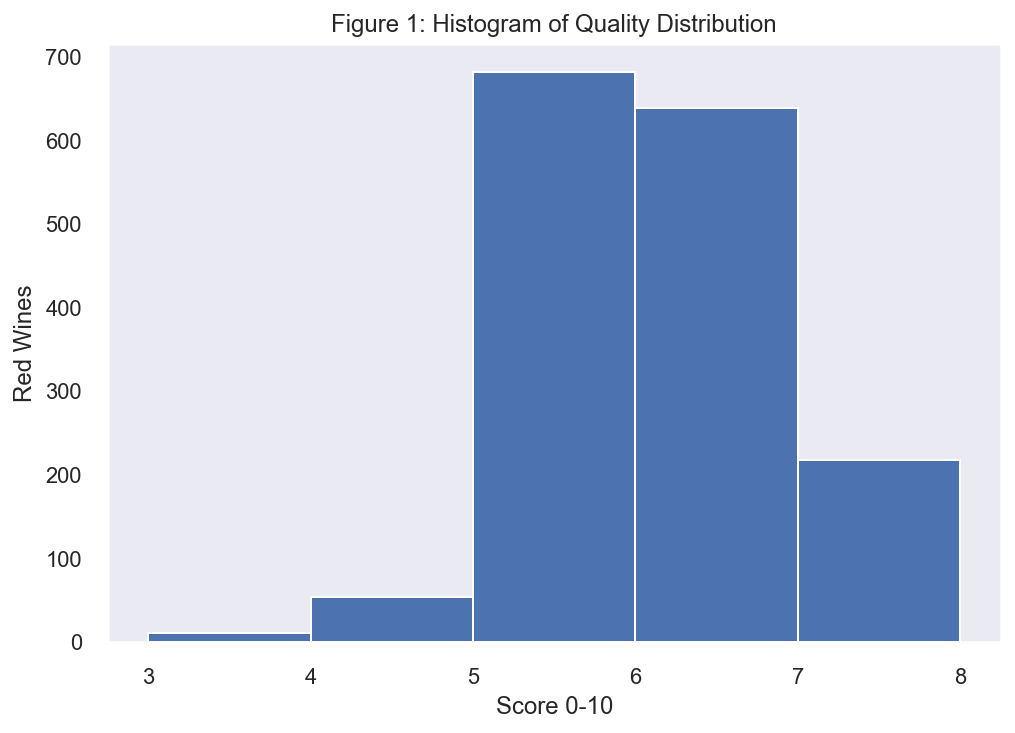

In [44]:
df['quality'].hist(grid=False, bins=5)
plt.xlabel('Score 0-10')
plt.ylabel('Red Wines')
plt.title('Figure 1: Histogram of Quality Distribution')


### Box plot of alcohol content
Alcohol is a key component of red wine but it may not necessarily add to its quality of, in fact often too strong an alcohol content can negatively affect the sensory experience. Alcohol content is also relevant in other areas of viniculture and may represent the primacy of certain techniques.

This box plot exists to ensure that the data does not present a wide spread of alcohol as alcohol content can be a classification on its own.

Alcohol content seems to have several outliers that may need to be addressed. Otherwise, no real surprises as alcohol content sits within a narrow range.


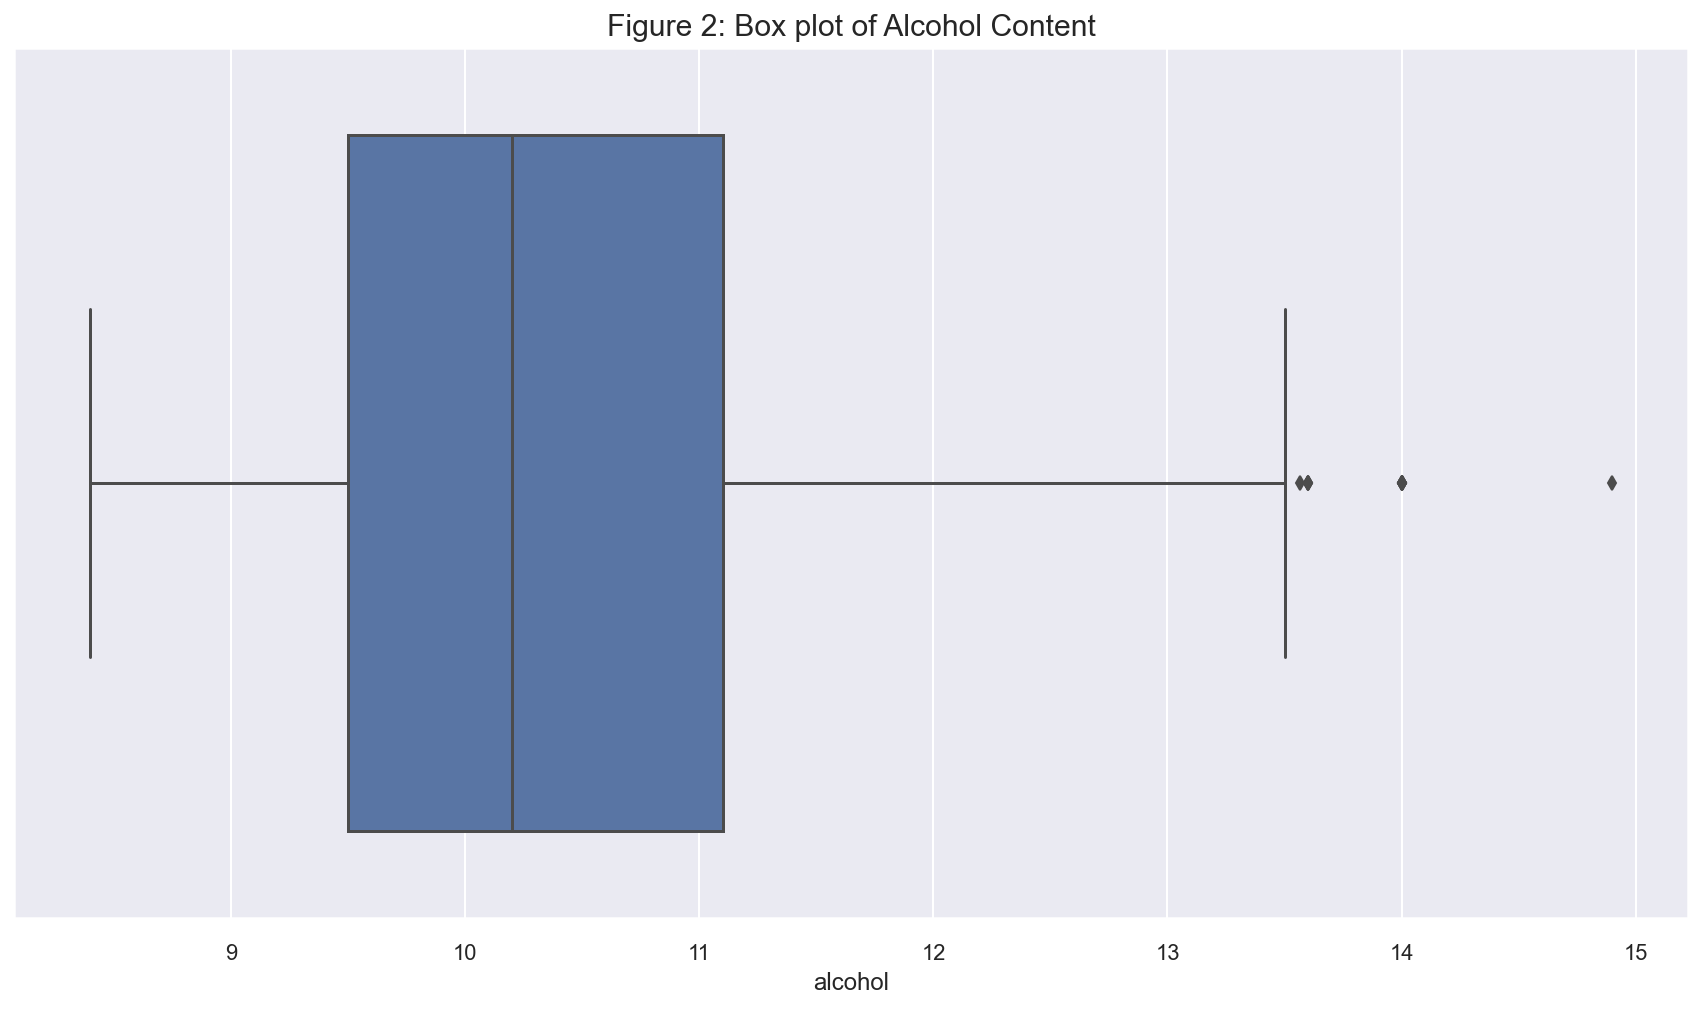

In [46]:
plt.figure(figsize = (15,8))
sns.boxplot(df['alcohol']).set_title('Figure 2: Box plot of Alcohol Content', fontsize = 15)
plt.show();

## Two-Variable Visualisation 
### Boxplot of Alcohol and Quality
As mentioned above, alcohol content is a consideration is assessing the quality of red wine and can be indicative of certain agricultural practices and fermenting techniques. This boxplot seeks to learn if there is any significant relationship between the two variables e.g. if there is significant variation in alcohol content at each level of quality and if there is any correlation between alcohol content and quality.

The plot shows us that there seems to be a correlation between alcohol content and quality but the large number of outliers at the middle level suggests either more cleaning is required or alcohol may only be a co-factor in quality.


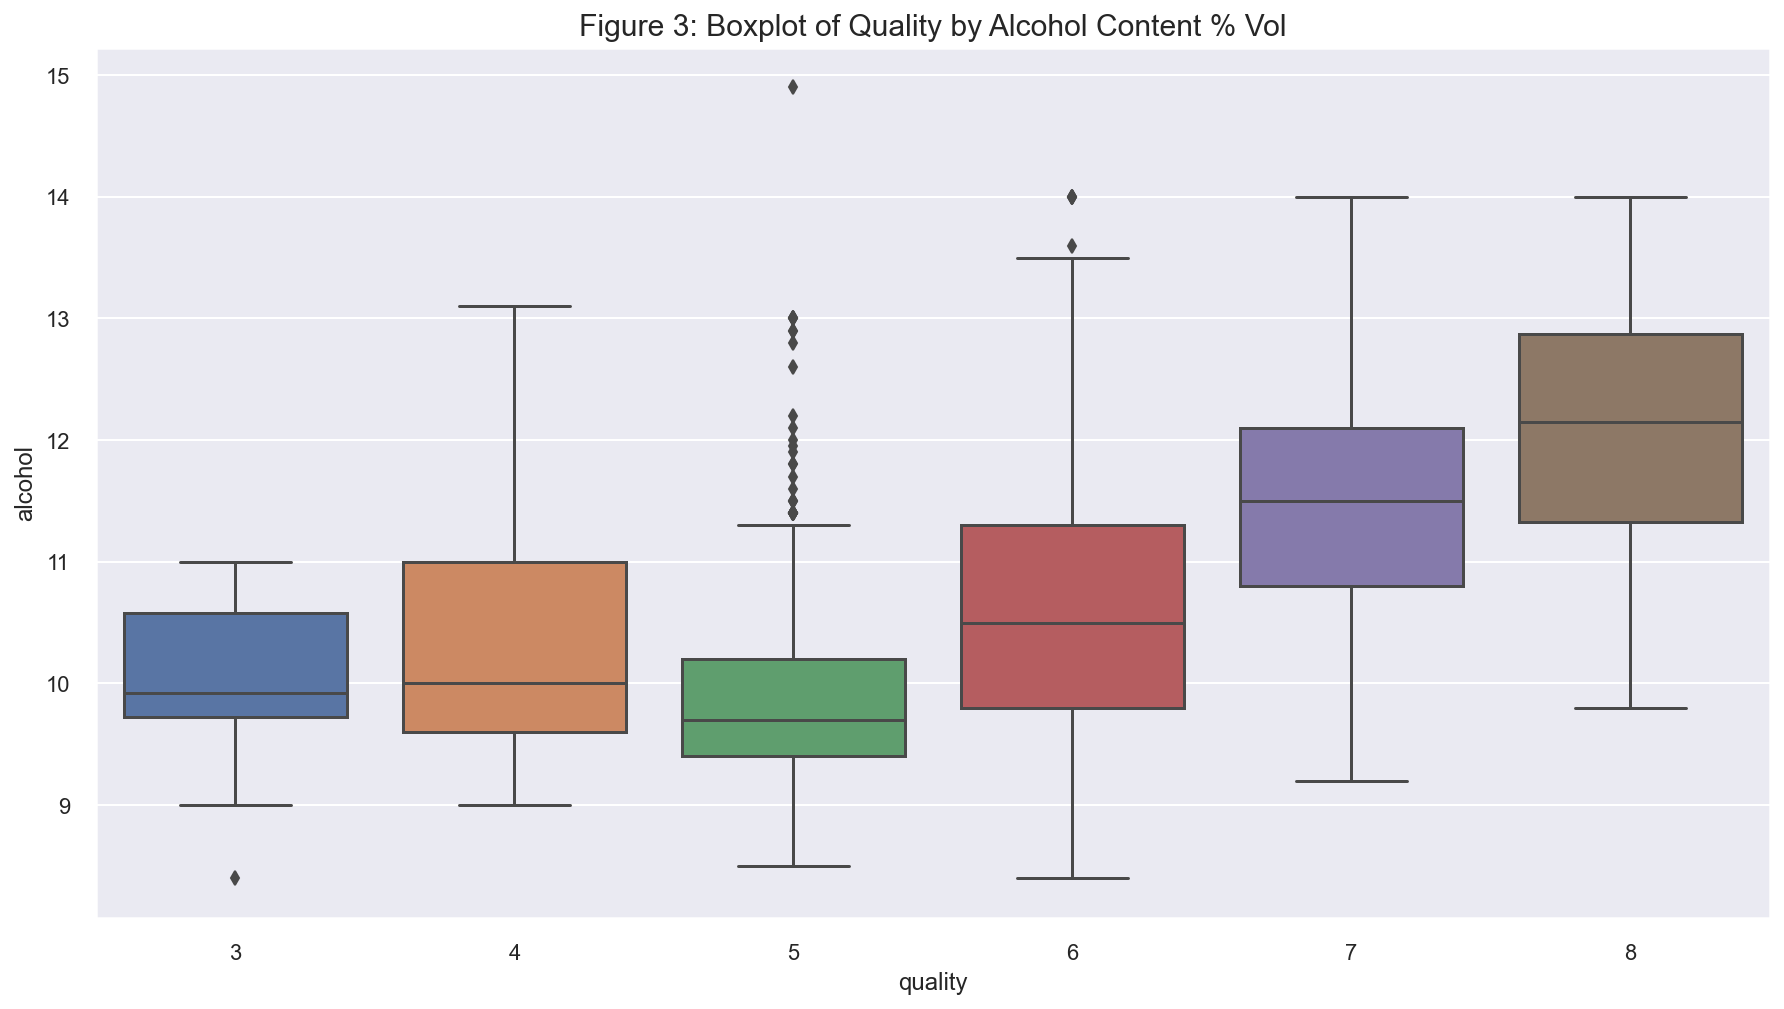

In [51]:
plt.figure(figsize = (15,8))
sns.boxplot(df['quality'], df['alcohol']);
plt.title('Figure 3: Boxplot of Quality by Alcohol Content % Vol', fontsize = 15)
plt.show();


## Scatterplot pH and Alcohol content
This plot attempts to detect any correlation between alcohol content and another critical element in red wine production, that of pH level. pH influences microbiological stability, affects the equilibrium of tartrate salts, determines the effectiveness of sulphur dioxide and enzyme additions, influences the solubility of proteins and effectiveness of bentonite, and affects red wine colour and oxidative and browning reactions (Boulton et al, 1996)

pH is a fundamental quality in red wine that must fall within a certain 'sweet spot' otherwise all may be lost. There will likely be a correlation between a certain pH level and quality, but this plot seeks to reveal pH levels relationship with alcohol.

We see below that there is no strong correlation between the two variables.


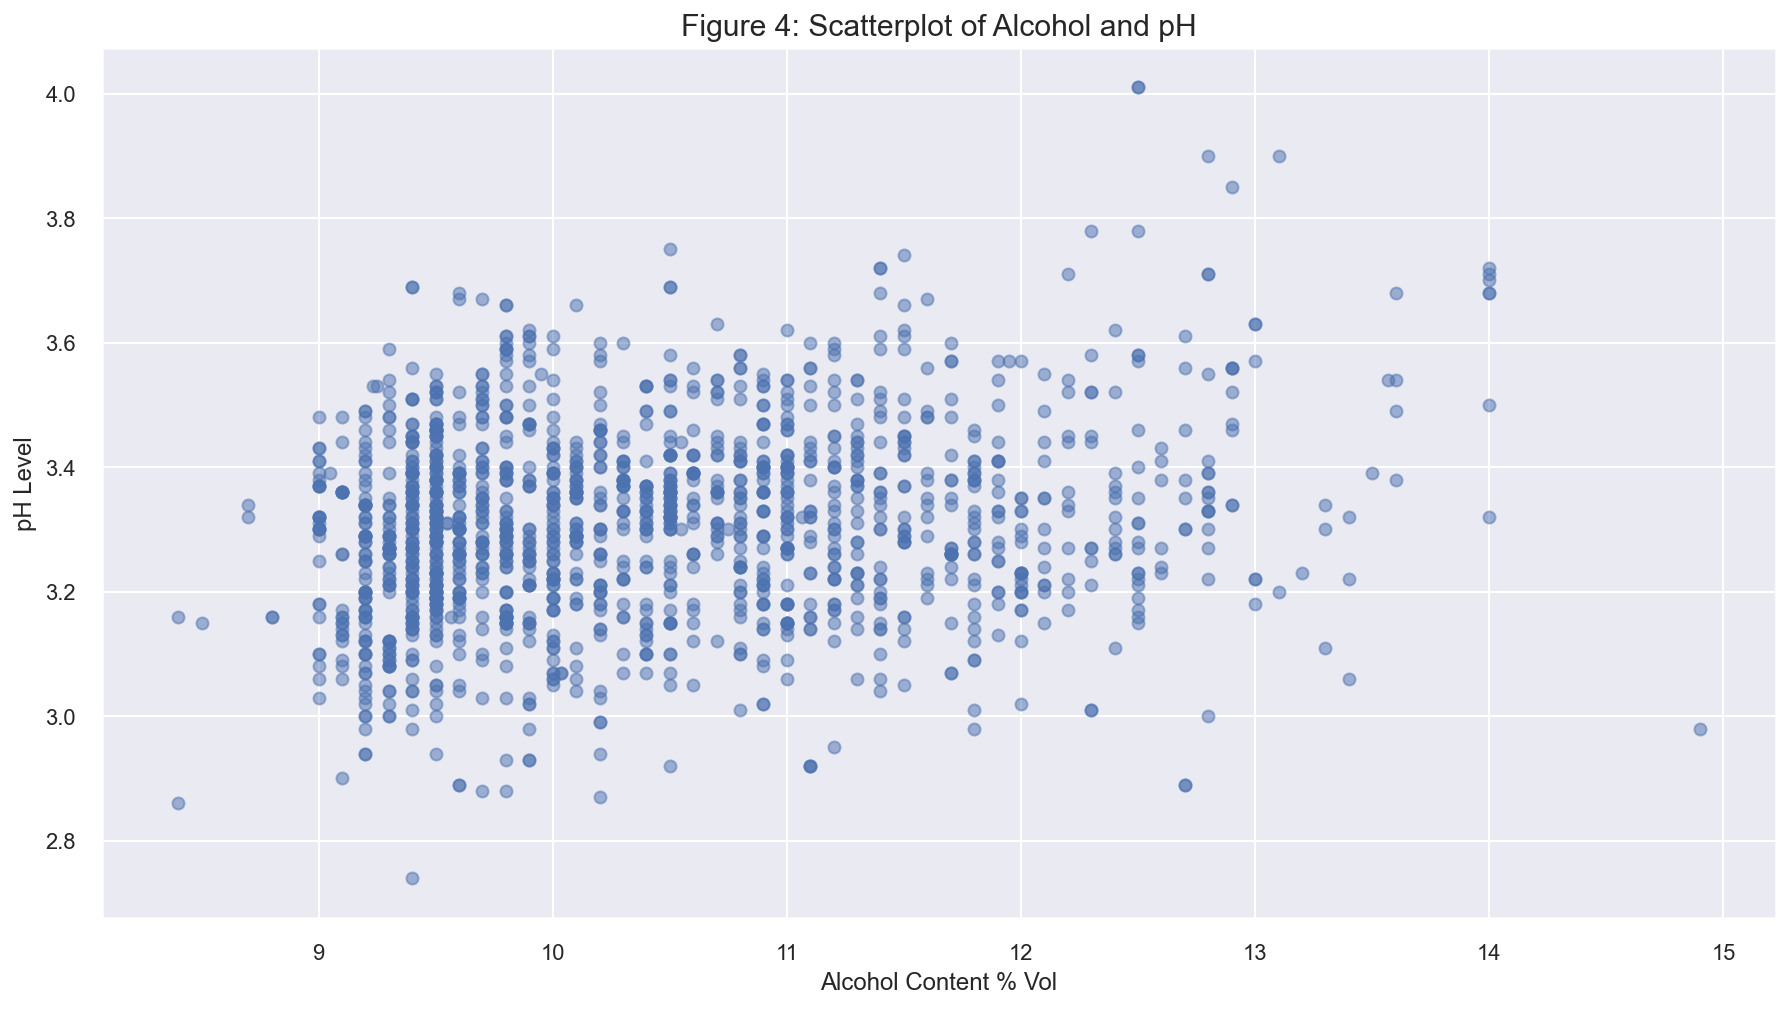

In [52]:
plt.figure(figsize = (15,8))
plt.scatter(df['alcohol'], df['pH'], alpha = 0.5)
plt.title('Figure 4: Scatterplot of Alcohol and pH', fontsize = 15)
plt.xlabel('Alcohol Content % Vol')
plt.ylabel('pH Level')
plt.show();


## Three-Variable Visualisation
### Pairplot of Dataset

This plot seeks to learn if there are any strong correlations between the descriptive and target features, and between the descriptve features themselves.

Several strong relationships, both positive and negative can be seen between the different acids and pH level, which is to be expected. There is also a clear negative relationship between quality and volatile acids. And some interesting, but possibly irrelevant, relationships between density and other dependant variables like pH.

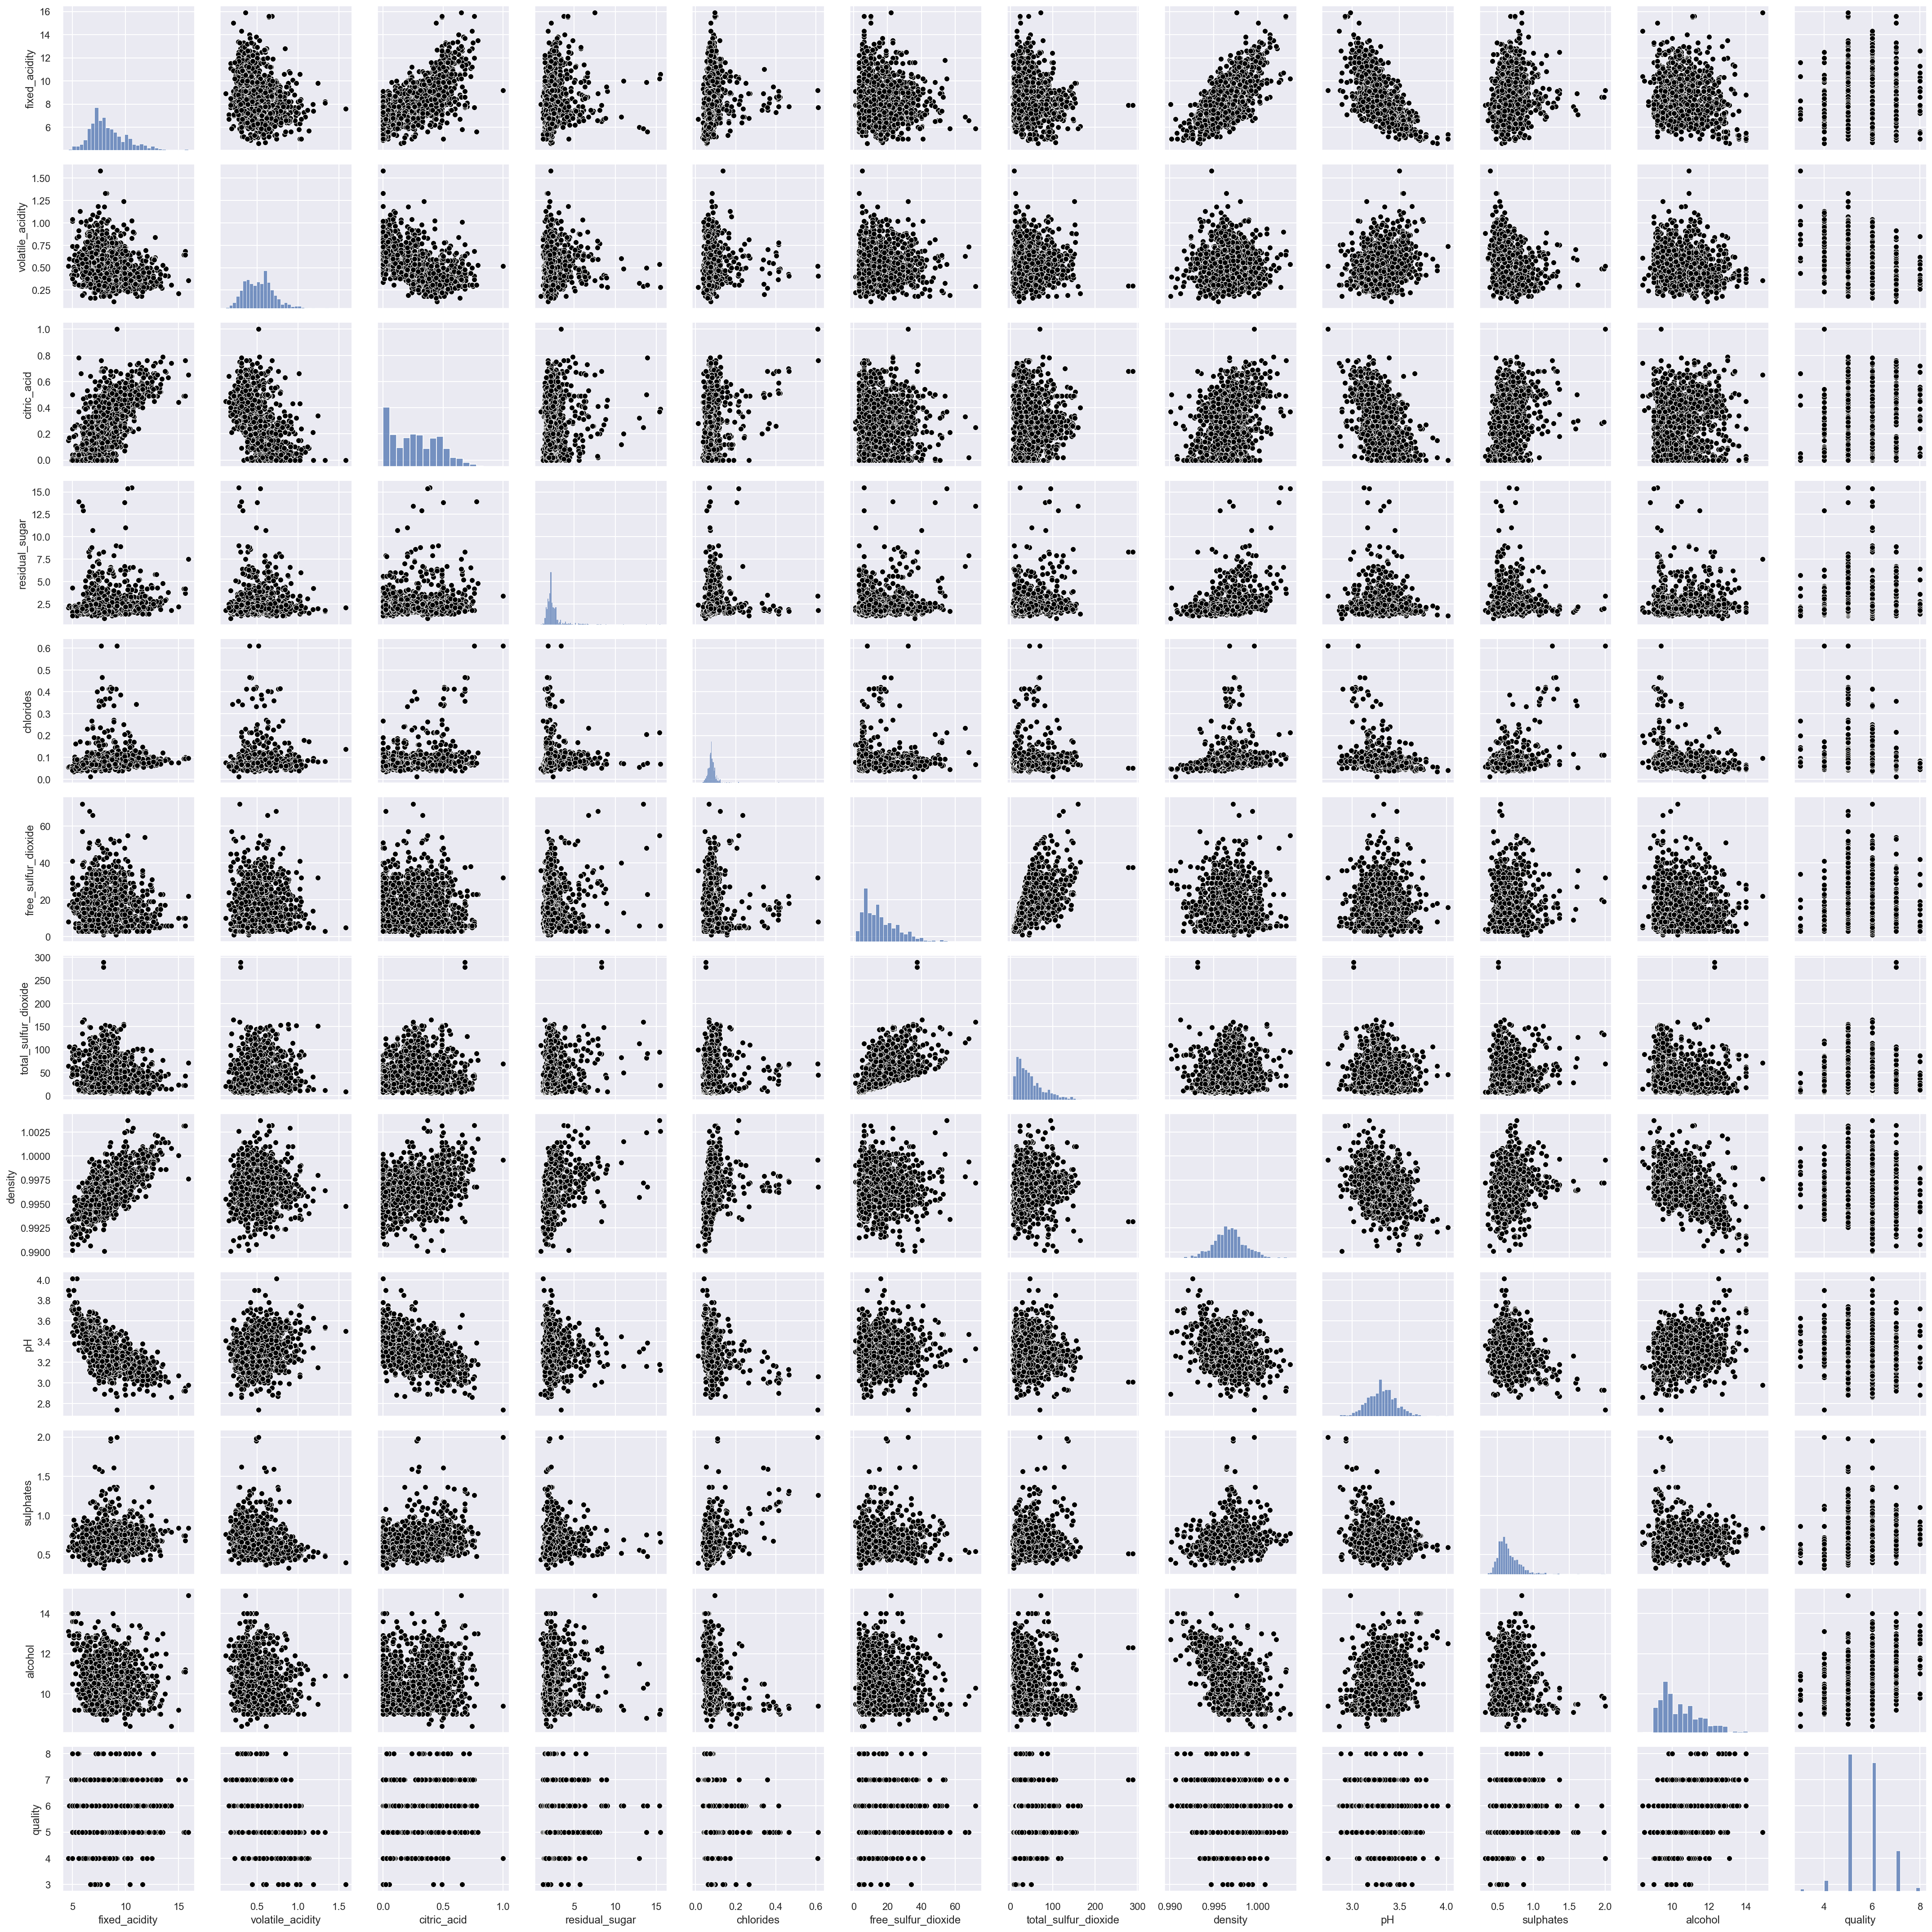

In [53]:
sns.pairplot(df,  plot_kws={'color':'black'})
plt.tight_layout();

### Scatterplot of Quality broken down by Alcohol and Citric Acid
From the above plot we learn many things. Interestingly there appears to be very few positive correlations relating directly to quality outside of alcohol content, density and citric acid. Which is what the below plot wil explore. 

The plot does suggest a positive trend for the two descriptive variables towards higher quality red wine, as the data points grow darker as you move towards the upper right corner.

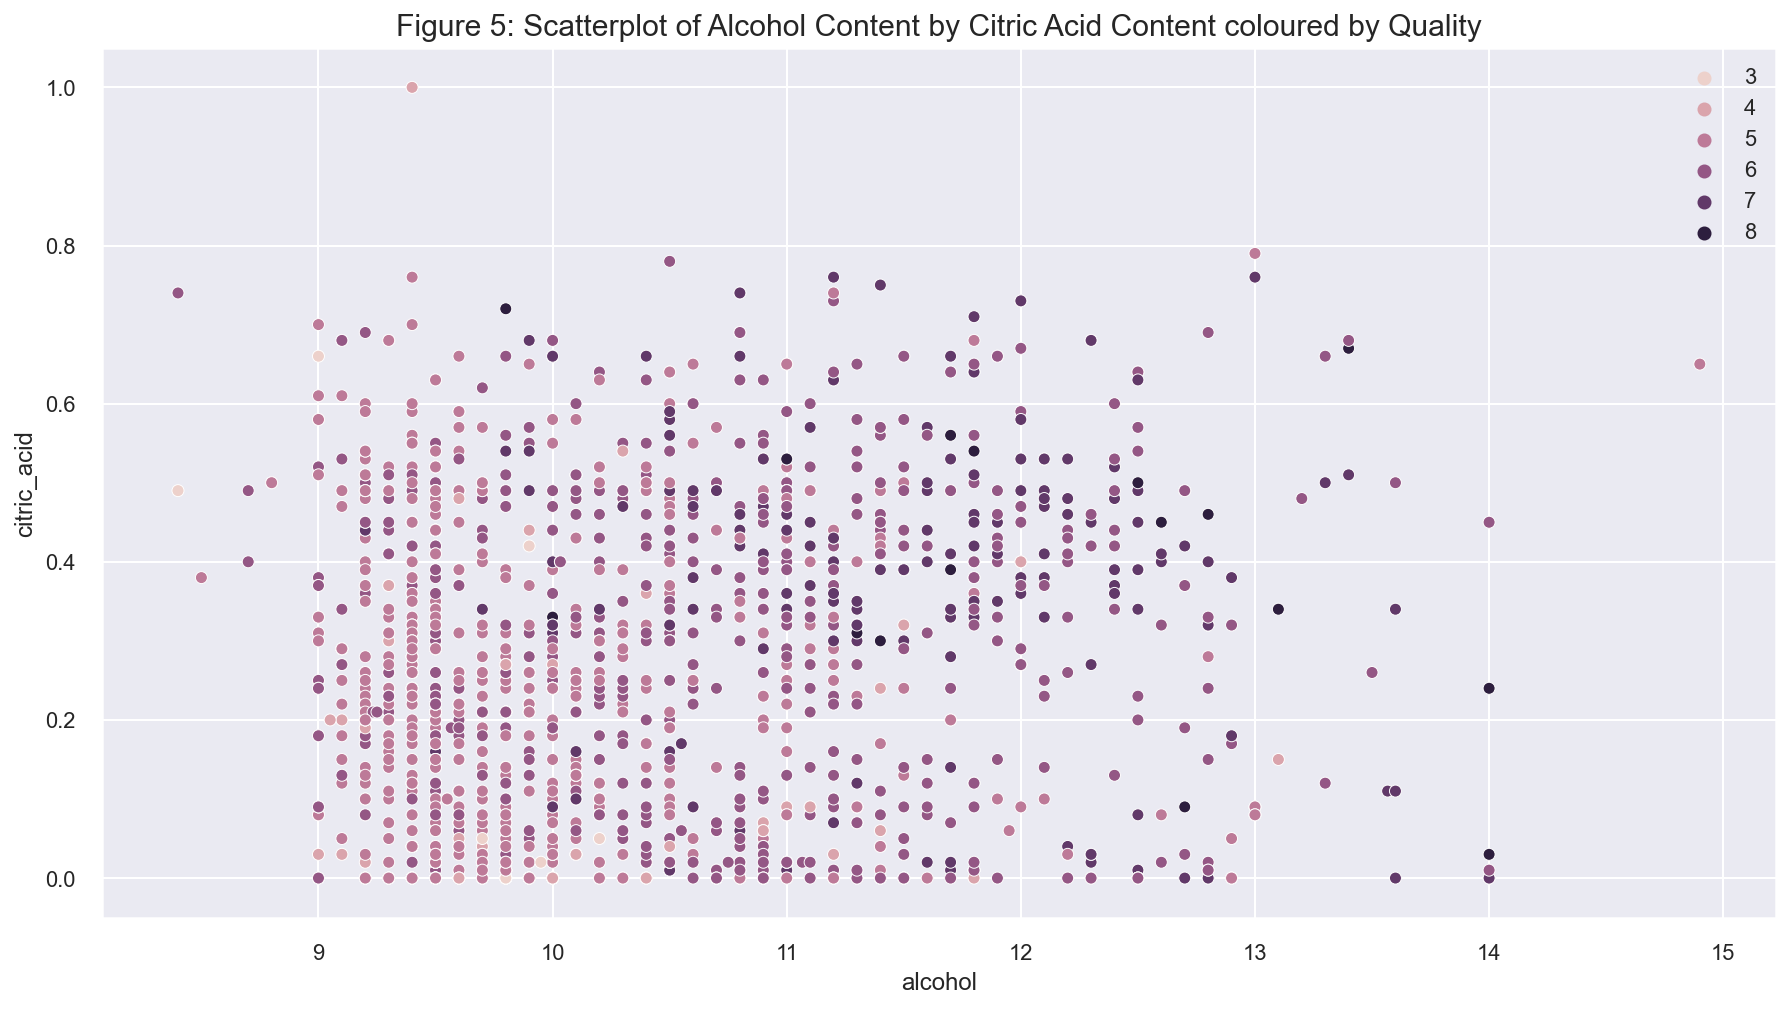

In [63]:
plt.figure(figsize = (15,8))
sns.scatterplot(df['alcohol'], df['citric_acid'], hue = df['quality'])
plt.title('Figure 5: Scatterplot of Alcohol Content by Citric Acid Content coloured by Quality', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();


# Summary & Conclusions <a id = 'summary'></a>
Being able to predict the quality of a red wine before going through the rigors of bottling, marketing and distribution could save a business a tremendous amount of time and money. The goal of this project is to identify what chemical factors relate to a high scoring wine and ultimately predicting said quality straight out of the barrel through chemical analysis and this model.

For the first stage of this project the data was read, and the headings modified to facilitate further visualisations. Due to the data coming from a ML depository there were no missing values and no need to drop any variables as they were all relevant because they make up key chemical elements in wine analysis. 

Exploring the data through numerous visualisation methods revealed that the bulk of wines tested sit at a score of 5 & 6 but that there was some skewing to the right that may require further attention. Alcohol content sits in a range between 8% and 15% with most wines resting somewhere between 9.5% and 11.1%. Furthering the exploration of alcohols relationship to quality, it was discovered that higher quality wines did possess a higher alcohol content suggesting a correlation between the two. During research pH level was found to be another significant factor influencing wine quality, but no correlation was found when plotted with alcohol, these two variables seem important but are independent from each other.

A pair plot allowed for each variable to be measured against each other to investigate further any unexpected correlations. Many found were to be expected e.g. a strong negative correlation between the several acids present and pH level and a negative trend between quality and volatile acids. But a relationship between citric acid and quality was found and when the quality variable was broken down by alcohol content and citric acid content it revealed a clear relationship between the low content of these variables and low quality scores which shows that these two ingredients are critical to the quality of the wine and therefore the purpose of this project.



## References <a id = 'references'></a>

Boulton, R. B., Singleton, V. L., Bisson, L. F., & Kunkee, R. E. (2013). Principles and practices of winemaking. Springer Science & Business Media.

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision support systems, 47(4), 547-553.